In [ ]:
# Dependencies
import pandas as pd                     # for handling and structuring data
import matplotlib.pyplot as plt         # for creating plots
import matplotlib.ticker as ticker
import scipy.stats as st                # for statistical functions
import numpy as np                      # for generating random numbers and handling numerical operations
from scipy.stats import linregress      # for calculating linear regression

# need to switch to csv
# Load the CSV file
file_path = 'Resources/new_data.csv'
csv_df = pd.read_csv(file_path, header=0)

# Display sheet names to identify relevant data
print(csv_df)

                                Track                        Album Name  \
0                 MILLION DOLLAR BABY      Million Dollar Baby - Single   
1                         Not Like Us                       Not Like Us   
2          i like the way you kiss me        I like the way you kiss me   
3                             Flowers                  Flowers - Single   
4                             Houdini                           Houdini   
...                               ...                               ...   
4595                For the Last Time                 For the Last Time   
4596                 Dil Meri Na Sune  Dil Meri Na Sune (From "Genius")   
4597            Grace (feat. 42 Dugg)                           My Turn   
4598              Nashe Si Chadh Gayi             November Top 10 Songs   
4599  Me Acostumbre (feat. Bad Bunny)   Me Acostumbre (feat. Bad Bunny)   

              Artist Release Date All Time Rank Spotify Streams  \
0      Tommy Richman    4/26/202

In [5]:

# Select relevant columns

columns_to_select=['Track', 'Album Name', 'Artist', 'Release Date', 'All Time Rank','YouTube Views', 'TikTok Views', 'Explicit Track']

youtube_views_data = csv_df[columns_to_select]

youtube_views_data.head()

,Track,Album Name,Artist,Release Date,All Time Rank,YouTube Views,TikTok Views,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,1,"84,274,754","5,332,281,936",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,2,"116,347,040","208,339,025",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,3,"122,599,116","3,369,120,610",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,4,"1,096,100,899","14,603,725,994",0
4,Houdini,Houdini,Eminem,5/31/2024,5,"77,373,957",NaN,1


In [7]:
# Show count of each column
youtube_views_data.count()

Track             4600
Album Name        4600
Artist            4595
Release Date      4600
All Time Rank     4600
YouTube Views     4292
TikTok Views      3619
Explicit Track    4600
dtype: int64

In [9]:
# Drop blank rows
youtube_views_data_clean = youtube_views_data.dropna()
youtube_views_data_clean.count()

Track             3531
Album Name        3531
Artist            3531
Release Date      3531
All Time Rank     3531
YouTube Views     3531
TikTok Views      3531
Explicit Track    3531
dtype: int64

In [11]:
# Show new data
print(youtube_views_data_clean.dtypes)

Track             object
Album Name        object
Artist            object
Release Date      object
All Time Rank     object
YouTube Views     object
TikTok Views      object
Explicit Track     int64
dtype: object


In [13]:
# Conversion to start
print("Before conversion:")
print(youtube_views_data_clean[['TikTok Views', 'All Time Rank', 'YouTube Views']].count())

Before conversion:
TikTok Views     3531
All Time Rank    3531
YouTube Views    3531
dtype: int64


In [15]:
# Function to convert to numeric
def convert_to_numeric(value):
    if pd.isna(value):
        return np.nan
    try:
        # Remove commas and convert to float
        return float(str(value).replace(',', ''))
    except ValueError:
        return np.nan

# Apply the conversion to both columns
youtube_views_data_clean['TikTok Views'] = youtube_views_data_clean['TikTok Views'].apply(convert_to_numeric)
youtube_views_data_clean['All Time Rank'] = youtube_views_data_clean['All Time Rank'].apply(convert_to_numeric)
youtube_views_data_clean['YouTube Views'] = youtube_views_data_clean['YouTube Views'].apply(convert_to_numeric)

# Check the results
print("After conversion:")
print(youtube_views_data_clean[['TikTok Views', 'All Time Rank', 'YouTube Views']].dtypes)
print(youtube_views_data_clean[['TikTok Views', 'All Time Rank', 'YouTube Views']].count())

# Check for any remaining non-numeric values
print("\nNon-numeric values in TikTok Views:")
print(youtube_views_data_clean[pd.isna(youtube_views_data_clean['TikTok Views'])]['TikTok Views'].head())

print("\nNon-numeric values in All Time Rank:")
print(youtube_views_data_clean[pd.isna(youtube_views_data_clean['All Time Rank'])]['All Time Rank'].head())

print("\nNon-numeric values in All Time Rank:")
print(youtube_views_data_clean[pd.isna(youtube_views_data_clean['YouTube Views'])]['YouTube Views'].head())

# Display sample of original values
print("\nSample of original TikTok Views values:")
print(youtube_views_data_clean['TikTok Views'].head())

print("\nSample of original All Time Rank values:")
print(youtube_views_data_clean['All Time Rank'].head())

print("\nSample of original YouTube Views values:")
print(youtube_views_data_clean['YouTube Views'].head())

After conversion:
TikTok Views     float64
All Time Rank    float64
YouTube Views    float64
dtype: object
TikTok Views     3531
All Time Rank    3531
YouTube Views    3531
dtype: int64

Non-numeric values in TikTok Views:
Series([], Name: TikTok Views, dtype: float64)

Non-numeric values in All Time Rank:
Series([], Name: All Time Rank, dtype: float64)

Non-numeric values in All Time Rank:
Series([], Name: YouTube Views, dtype: float64)

Sample of original TikTok Views values:
0    5.332282e+09
1    2.083390e+08
2    3.369121e+09
3    1.460373e+10
5    2.938687e+09
Name: TikTok Views, dtype: float64

Sample of original All Time Rank values:
0    1.0
1    2.0
2    3.0
3    4.0
5    6.0
Name: All Time Rank, dtype: float64

Sample of original YouTube Views values:
0    8.427475e+07
1    1.163470e+08
2    1.225991e+08
3    1.096101e+09
5    1.311481e+08
Name: YouTube Views, dtype: float64


C:\Users\jmcle\AppData\Local\Temp\ipykernel_7276\1956981985.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_views_data_clean['TikTok Views'] = youtube_views_data_clean['TikTok Views'].apply(convert_to_numeric)
C:\Users\jmcle\AppData\Local\Temp\ipykernel_7276\1956981985.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_views_data_clean['All Time Rank'] = youtube_views_data_clean['All Time Rank'].apply(convert_to_numeric)
C:\Users\jmcle\AppData\Local\Temp\ipykernel_7276\1956981985.py:1

In [17]:
# Sort by TikTok Views
tik_tok_sort = youtube_views_data_clean.sort_values(by='TikTok Views', ascending=True)

tik_tok_sort.to_csv('check.csv',index=False)

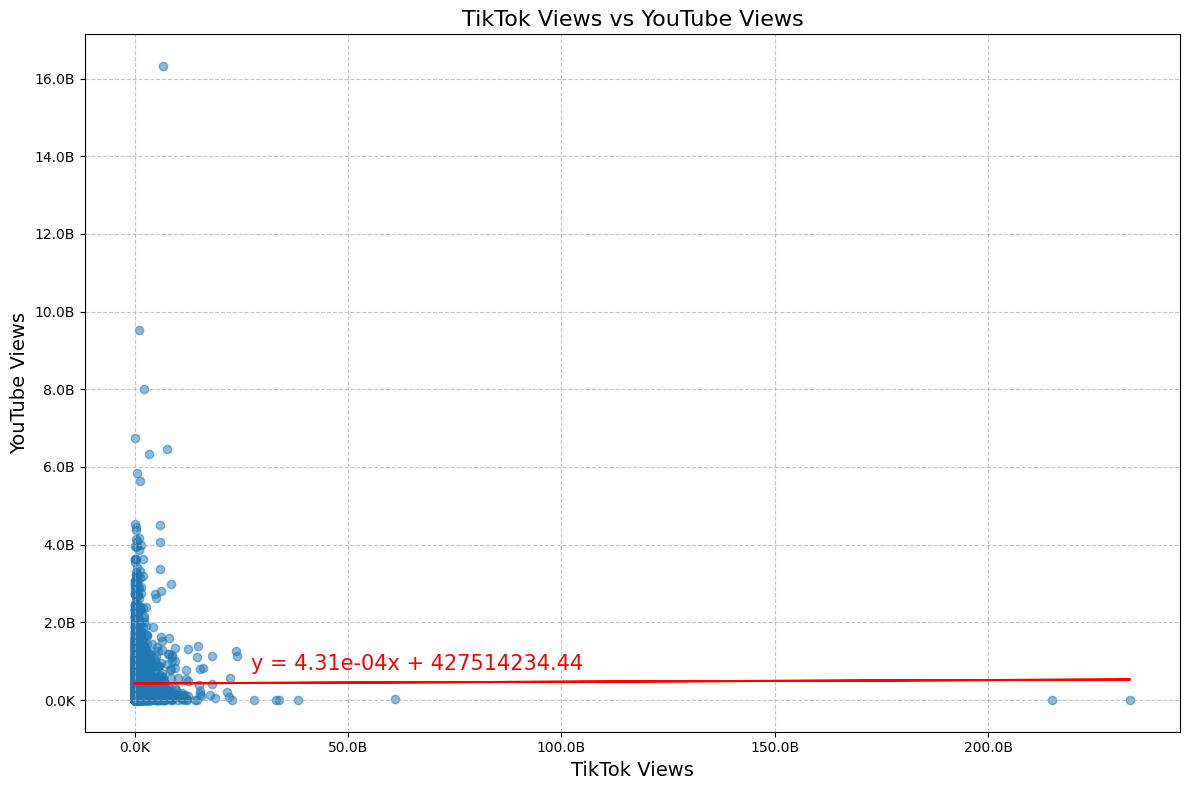

Correlation between TikTok Views and YouTube Views: 0.0035


In [19]:
def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(youtube_views_data_clean['TikTok Views'], 
            youtube_views_data_clean['YouTube Views'], 
            alpha=0.5)  # alpha for transparency

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(youtube_views_data_clean['TikTok Views'], 
                                                            youtube_views_data_clean['YouTube Views'])
line = slope * youtube_views_data_clean['TikTok Views'] + intercept

# Plot the line of best fit
plt.plot(youtube_views_data_clean['TikTok Views'], line, color='r', label=f'y = {slope:.2e}x + {intercept:.2f}')

# Add the formula as a label on the graph
x_pos = youtube_views_data_clean['TikTok Views'].mean()  # x-position for the label
y_pos = slope * x_pos + intercept  # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(200,10), 
             ha='center', 
             fontsize=15, 
             color='red')


# Set labels and title
plt.xlabel('TikTok Views', fontsize=14)
plt.ylabel('YouTube Views', fontsize=14)
plt.title('TikTok Views vs YouTube Views', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation
correlation = youtube_views_data_clean['TikTok Views'].corr(youtube_views_data_clean['YouTube Views'])
print(f"Correlation between TikTok Views and YouTube Views: {correlation:.4f}")

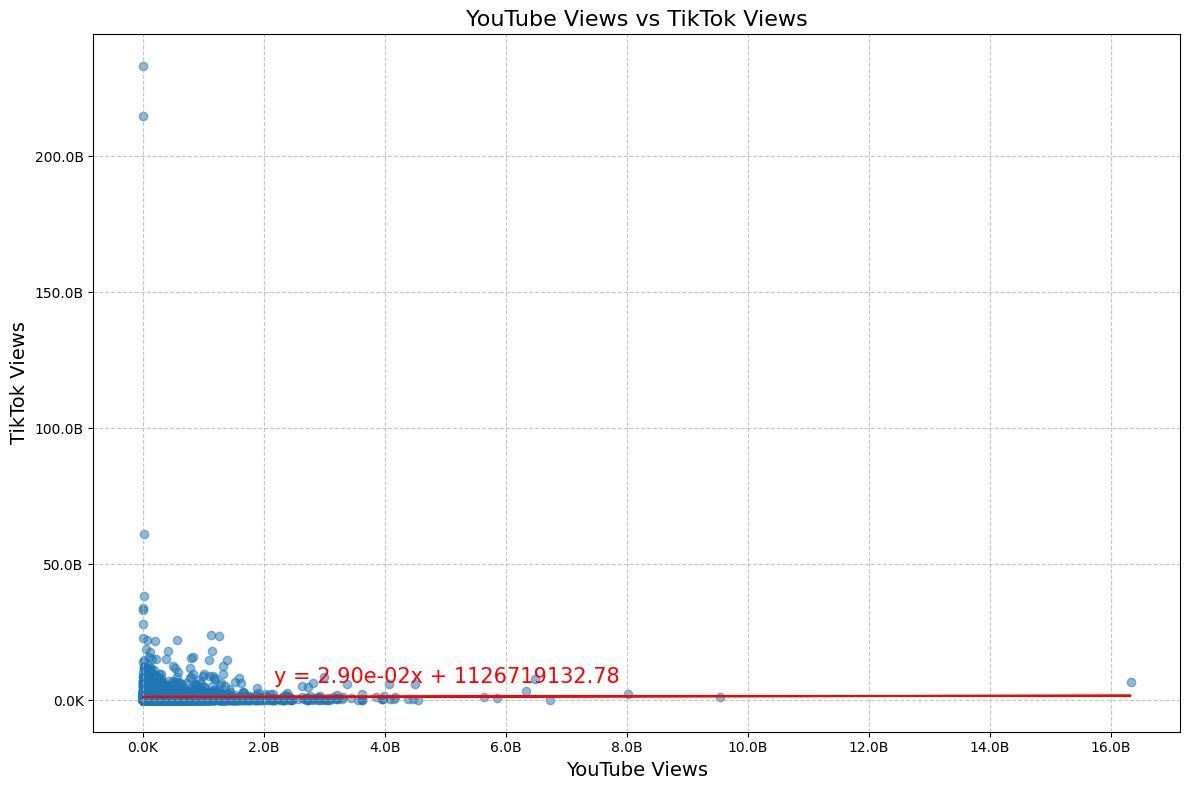

Correlation between YouTube Views and TikTok Views: 0.0035


In [25]:
def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(youtube_views_data_clean['YouTube Views'], 
            youtube_views_data_clean['TikTok Views'], 
            alpha=0.5)  # alpha for transparency

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(youtube_views_data_clean['YouTube Views'], 
                                                            youtube_views_data_clean['TikTok Views'])
line = slope * youtube_views_data_clean['YouTube Views'] + intercept

# Plot the line of best fit
plt.plot(youtube_views_data_clean['YouTube Views'], line, color='r', label=f'y = {slope:.2e}x + {intercept:.2f}')

# Add the formula as a label on the graph
x_pos = youtube_views_data_clean['YouTube Views'].mean()  # x-position for the label
y_pos = slope * x_pos + intercept  # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(200,10), 
             ha='center', 
             fontsize=15, 
             color='red')


# Set labels and title
plt.xlabel('YouTube Views', fontsize=14)
plt.ylabel('TikTok Views', fontsize=14)
plt.title('YouTube Views vs TikTok Views', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation
correlation = youtube_views_data_clean['YouTube Views'].corr(youtube_views_data_clean['TikTok Views'])
print(f"Correlation between YouTube Views and TikTok Views: {correlation:.4f}")

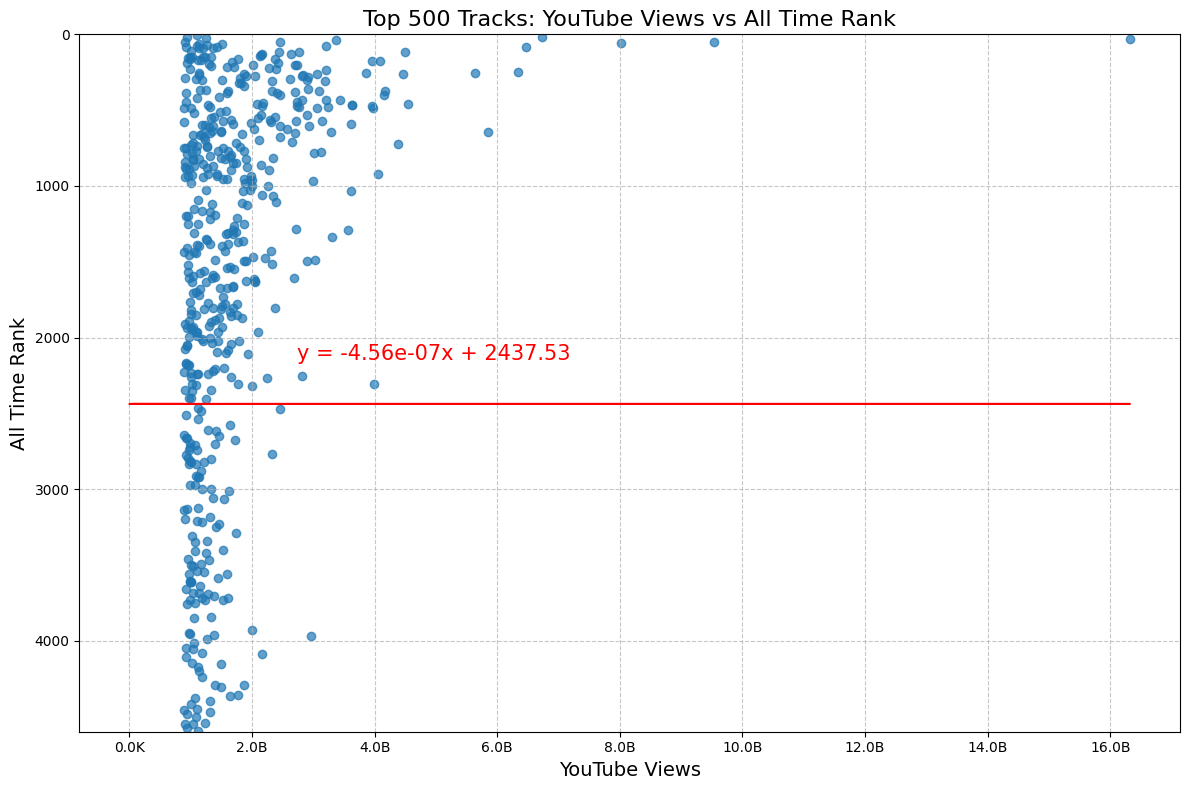

Correlation between YouTube Views and All Time Rank for top 500: -0.3434

Statistics for Top 500 tracks:
Average YouTube Views: 1,724,779,260
Average All Time Rank: 1589.60
Highest YouTube Views: 16,322,756,555
Best (Lowest) All Time Rank: 4


In [37]:
# Sort the dataframe by TikTok Views in descending order and take the top 500
top_500 = youtube_views_data_clean.sort_values('YouTube Views', ascending=False).head(500)

def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(top_500['YouTube Views'], 
            top_500['All Time Rank'], 
            alpha=0.7)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(youtube_views_data_clean['YouTube Views'], 
                                                            youtube_views_data_clean['All Time Rank'])
line = slope * youtube_views_data_clean['All Time Rank'] + intercept

# Plot the line of best fit
plt.plot(youtube_views_data_clean['YouTube Views'], line, color='r', label=f'y = {slope:.2e}x + {intercept:.2f}')

# Add the formula as a label on the graph
x_pos = youtube_views_data_clean['YouTube Views'].mean()  # x-position for the label
y_pos = slope * x_pos + intercept  # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(200,10), 
             ha='center', 
             fontsize=15, 
             color='red')


# Set labels and title
plt.xlabel('YouTube Views', fontsize=14)
plt.ylabel('All Time Rank', fontsize=14)
plt.title('Top 500 Tracks: YouTube Views vs All Time Rank', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set y-axis limits
max_popularity = youtube_views_data_clean['All Time Rank'].max()
plt.ylim(0, max_popularity)  # This sets the y-axis range

# Invert y-axis so that lower ranks (better) are at the top
plt.gca().invert_yaxis()

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation for the top 500
correlation = top_500['YouTube Views'].corr(top_500['All Time Rank'])
print(f"Correlation between YouTube Views and All Time Rank for top 500: {correlation:.4f}")

# Print some statistics
print("\nStatistics for Top 500 tracks:")
print(f"Average YouTube Views: {top_500['YouTube Views'].mean():,.0f}")
print(f"Average All Time Rank: {top_500['All Time Rank'].mean():.2f}")
print(f"Highest YouTube Views: {top_500['YouTube Views'].max():,.0f}")
print(f"Best (Lowest) All Time Rank: {top_500['All Time Rank'].min():.0f}")

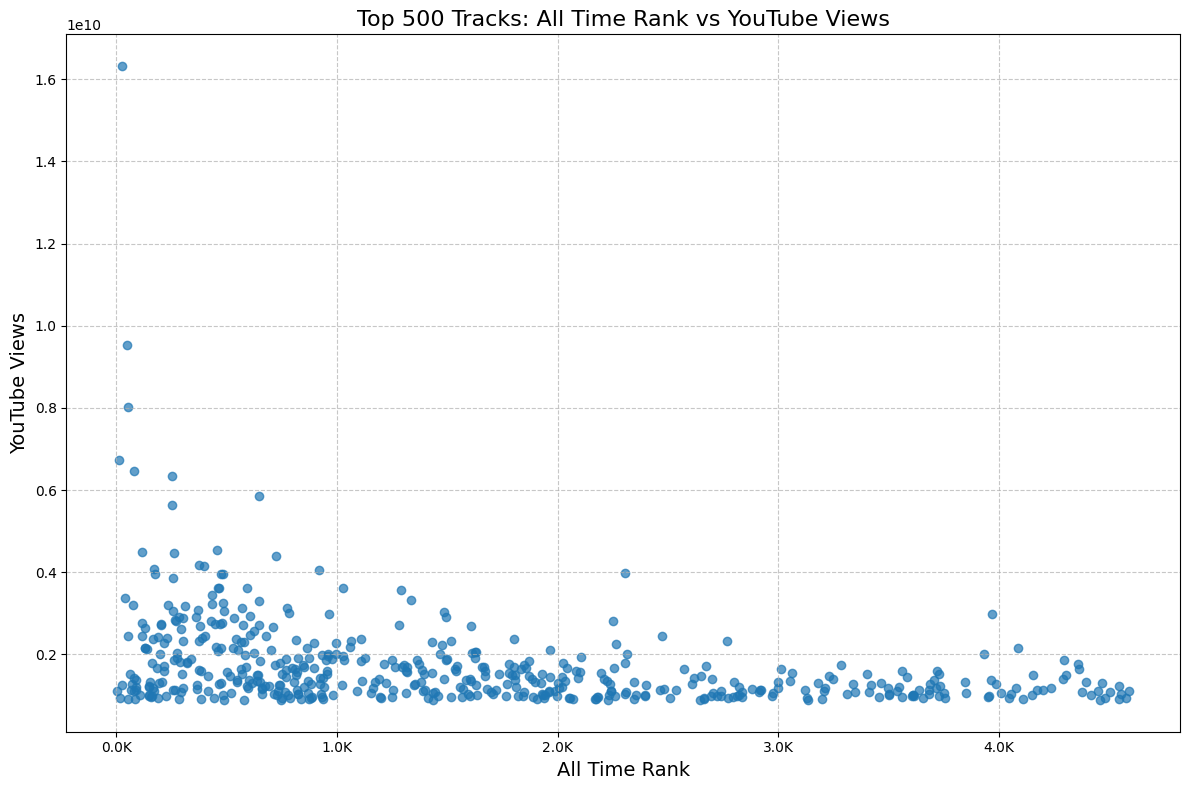

Correlation between YouTube Views and All Time Rank for top 500: -0.3434

Statistics for Top 500 tracks:
Average YouTube Views: 1,724,779,260
Average All Time Rank: 1589.60
Highest YouTube Views: 16,322,756,555
Best (Lowest) All Time Rank: 4


In [29]:
# Sort the dataframe by TikTok Views in descending order and take the top 500
top_500 = youtube_views_data_clean.sort_values('YouTube Views', ascending=False).head(500)

def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(top_500['All Time Rank'], 
            top_500['YouTube Views'], 
            alpha=0.7)

# Set labels and title
plt.xlabel('All Time Rank', fontsize=14)
plt.ylabel('YouTube Views', fontsize=14)
plt.title('Top 500 Tracks: All Time Rank vs YouTube Views', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))


# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation for the top 500
correlation = top_500['All Time Rank'].corr(top_500['YouTube Views'])
print(f"Correlation between YouTube Views and All Time Rank for top 500: {correlation:.4f}")

# Print some statistics
print("\nStatistics for Top 500 tracks:")
print(f"Average YouTube Views: {top_500['YouTube Views'].mean():,.0f}")
print(f"Average All Time Rank: {top_500['All Time Rank'].mean():.2f}")
print(f"Highest YouTube Views: {top_500['YouTube Views'].max():,.0f}")
print(f"Best (Lowest) All Time Rank: {top_500['All Time Rank'].min():.0f}")

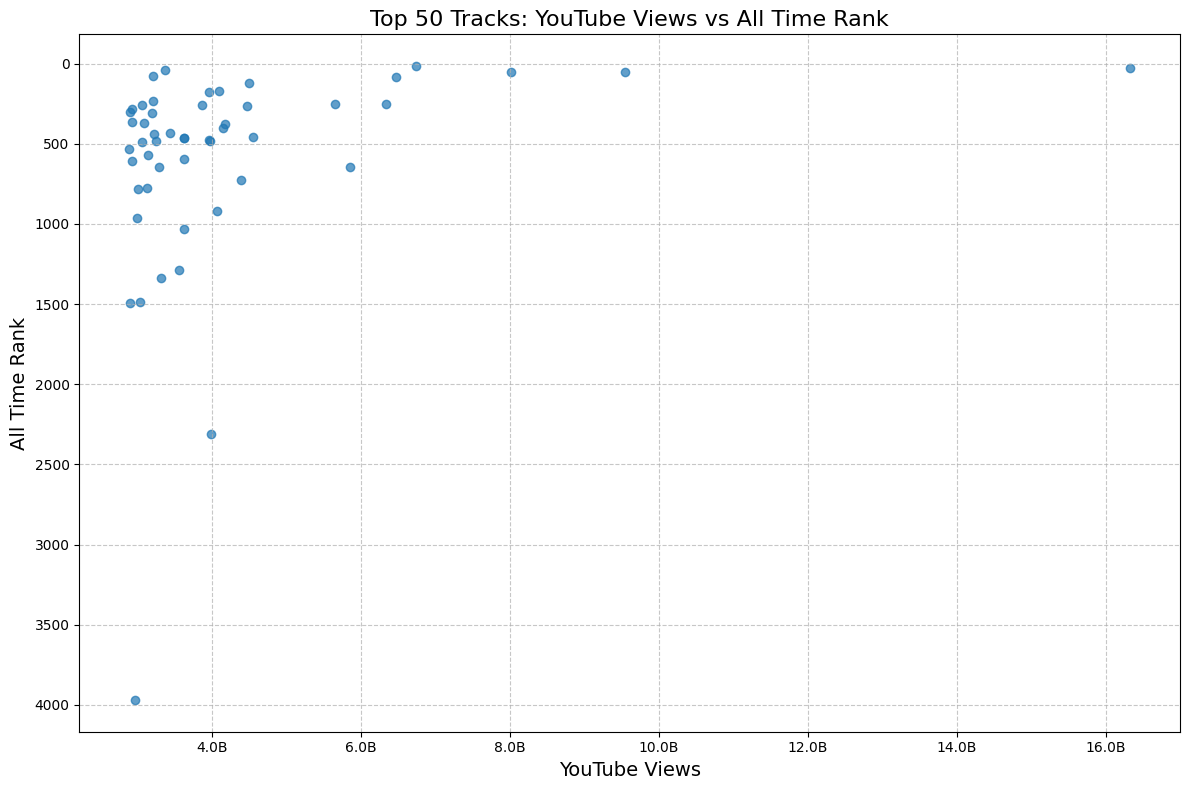

Correlation between YouTube Views and All Time Rank for top 50: -0.2838

Statistics for Top 50 tracks:
Average YouTube Views: 4,228,273,786
Average All Time Rank: 591.94
Highest YouTube Views: 16,322,756,555
Best (Lowest) All Time Rank: 15


In [31]:
# Sort the dataframe by TikTok Likes in descending order and take the top 50
top_50 = youtube_views_data_clean.sort_values('YouTube Views', ascending=False).head(50)

def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(top_50['YouTube Views'], 
            top_50['All Time Rank'], 
            alpha=0.7)

# Set labels and title
plt.xlabel('YouTube Views', fontsize=14)
plt.ylabel('All Time Rank', fontsize=14)
plt.title('Top 50 Tracks: YouTube Views vs All Time Rank', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Invert y-axis so that lower ranks (better) are at the top
plt.gca().invert_yaxis()

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation for the top 50
correlation = top_50['YouTube Views'].corr(top_50['All Time Rank'])
print(f"Correlation between YouTube Views and All Time Rank for top 50: {correlation:.4f}")

# Print some statistics
print("\nStatistics for Top 50 tracks:")
print(f"Average YouTube Views: {top_50['YouTube Views'].mean():,.0f}")
print(f"Average All Time Rank: {top_50['All Time Rank'].mean():.2f}")
print(f"Highest YouTube Views: {top_50['YouTube Views'].max():,.0f}")
print(f"Best (Lowest) All Time Rank: {top_50['All Time Rank'].min():.0f}")